# Travail pour le projet de Machine Learning.


Groupe GSI : Théophile Louvart et Matthieu Alcouffe.

Ce fichier explique et détaille les différentes analyses des fichiers QRT sur les retour de stocks. 


# Exploration des données et features

## **Importations des données et connection au Drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
x_train = pd.read_csv('/content/drive/My Drive/Projet ML/x_train.csv', index_col='ID')
y_train = pd.read_csv('/content/drive/My Drive/Projet ML/y_train.csv', index_col='ID')
x_test = pd.read_csv('/content/drive/My Drive/Projet ML/x_test.csv', index_col='ID')

In [ ]:
x_test

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,RET_6,VOLUME_6,RET_7,VOLUME_7,RET_8,VOLUME_8,RET_9,VOLUME_9,RET_10,VOLUME_10,RET_11,VOLUME_11,RET_12,VOLUME_12,RET_13,VOLUME_13,RET_14,VOLUME_14,RET_15,VOLUME_15,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
418595,2,0,37,12,5,94,0.020208,0.146176,0.010059,0.224756,0.002192,-0.474404,0.001903,0.026316,0.001466,0.079495,0.000586,-0.078154,-0.001611,-0.243718,-0.000146,-0.162995,-0.004519,-0.082635,0.003071,-0.261942,-0.013843,-0.385339,-0.002876,-0.589507,0.003463,0.060668,-0.001872,-0.249247,0.005939,-0.418752,0.022364,-0.301163,-0.001035,-0.416533,-0.000148,-0.004548,-0.000148,-0.161792,0.016997,-0.007221
418596,2,1,15,4,3,37,0.009134,-0.251631,0.021913,-0.712515,-0.007251,-0.328719,-0.017223,-0.921532,-0.019126,-0.857393,0.010695,-0.982053,-0.017356,-0.493607,0.008460,-0.797030,0.015403,-0.084381,0.016867,0.269908,-0.022475,-0.295082,0.040968,1.766451,0.006478,-0.386691,-0.012690,-0.525177,0.017562,-0.530799,-0.002062,-0.679724,-0.001544,-0.408979,0.001546,0.396372,-0.007875,-0.431760,0.001742,-0.574228
418597,2,4,57,20,8,142,0.005008,-0.115845,0.005914,-0.107441,-0.003927,0.347900,0.000873,0.731513,-0.086193,2.681007,0.028314,0.428653,-0.012561,0.323244,0.018152,0.037231,-0.005335,0.219277,0.000000,0.032683,-0.004494,-0.099527,0.002458,0.263624,0.000000,-0.336112,-0.006913,-0.039828,-0.007668,0.377134,0.004458,-0.451590,0.011481,-0.536967,0.009520,-0.368585,0.000000,0.022713,-0.002066,-0.207362
418598,2,5,35,12,5,91,0.015370,-0.090295,-0.013738,0.048465,0.008600,-0.218245,0.001915,-0.055296,0.008691,0.257485,0.016442,0.901757,0.027742,0.863997,0.006857,-0.930870,0.002546,-0.183697,0.000000,-0.399050,0.001785,-0.790012,-0.012840,-0.518844,0.008377,-0.350864,0.004847,-0.250060,-0.010600,-0.576994,-0.010984,-0.039714,0.037018,0.665132,-0.003097,0.141991,-0.008191,-0.172382,0.005145,-0.353172
418599,2,6,57,20,8,142,0.011419,-0.289027,0.022807,-0.262690,0.014645,-0.370676,-0.047796,-0.107222,-0.010220,-0.412849,0.024504,-0.289160,-0.004834,-0.658439,-0.004065,-0.847188,0.005270,-0.361449,0.014622,-0.739579,-0.001851,-0.785226,0.003608,-0.503767,-0.019612,-0.285158,-0.022215,-0.368104,-0.003550,-0.729463,0.001045,-0.565747,0.004304,-0.506291,-0.026469,-0.280666,0.010743,0.365773,-0.011134,0.933284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617019,222,5707,52,18,7,122,0.010188,-0.476830,-0.006419,-0.534137,-0.004669,-0.606061,0.013449,-0.209020,-0.003474,-0.154391,0.011803,-0.154500,-0.004749,-0.310132,0.003008,-0.428602,0.013723,0.199260,-0.005560,-0.151830,0.013836,-0.384315,0.009310,-0.012152,-0.010239,-0.437238,0.009561,-0.228109,-0.004630,-0.438108,-0.001028,-0.515748,0.019115,0.361119,-0.002090,-0.132224,0.015389,-0.014298,-0.008680,0.128657
617020,222,5710,33,10,4,83,-0.000838,-0.063269,-0.026928,0.532781,0.022102,0.565408,-0.010318,2.353415,-0.071291,2.465593,0.004041,0.142921,-0.004215,-0.186201,0.016288,0.102706,0.025657,-0.285509,-0.009066,-0.526759,0.051389,-0.317533,-0.001862,-0.050361,-0.030090,-0.222666,0.013418,0.133162,-0.017968,-0.545366,-0.007136,-0.203097,0.032965,0.108639,0.013488,-0.458271,0.019894,-0.353293,0.013513,-0.219671
617021,222,5714,49,17,7,113,0.005941,-0.506350,-0.016363,-0.173802,0.007740,-0.298538,0.015897,-0.411132,-0.004425,-0.362373,0.001022,-0.591829,0.002562,-0.397534,0.018261,-0.194824,0.013038,-0.268439,0.006918,-0.154597,0.023504,-0.040866,0.017102,-0.208627,-0.008388,0.010172,-0.003634,0.364811,-0.012559,0.301628,-0.016931,0.340198,0.002121,1.087437,-0.012910,1.791362,-0.057857,6.330687,-0.000493,1.175063


## **Analyse des données**

In [ ]:
#On analyse certain critère du set d'entrainement

x_train[x_train['DATE']==5]

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,RET_6,VOLUME_6,RET_7,VOLUME_7,RET_8,VOLUME_8,RET_9,VOLUME_9,RET_10,VOLUME_10,RET_11,VOLUME_11,RET_12,VOLUME_12,RET_13,VOLUME_13,RET_14,VOLUME_14,RET_15,VOLUME_15,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8017,5,0,37,12,5,94,-0.014405,0.192655,0.003614,0.353804,0.011156,-0.133228,0.000000,-0.085529,0.002700,0.001736,0.001932,-0.002344,-0.023032,-0.189261,0.008184,0.056926,0.006706,0.048753,0.007140,-0.229625,-0.008039,-0.162884,0.001725,-0.485297,0.003657,-0.168117,0.018024,-0.265975,-0.002735,-0.209810,0.002742,-0.367499,-0.005843,-0.405562,0.002930,-0.315935,0.010462,-0.474957,-0.003541,-0.260130
8018,5,1,15,4,3,37,-0.014093,-0.273614,-0.002237,-0.211939,0.023218,0.226292,0.012080,0.097937,0.006999,-0.329658,-0.003983,-0.170838,-0.038308,0.055023,-0.013697,0.081804,-0.005635,-0.111685,0.003929,-0.297591,-0.002039,-0.107632,0.013673,1.531594,-0.003327,0.148306,-0.000792,0.401211,-0.006762,NaN,-0.000786,NaN,-0.026018,NaN,-0.004722,NaN,0.019568,NaN,0.013697,NaN
8019,5,4,57,20,8,142,-0.009693,-0.133664,-0.004823,-0.118268,0.015234,-0.204353,0.003275,0.009205,0.000546,-0.126031,-0.012405,-0.331146,-0.039378,-0.292462,-0.027708,0.091320,0.001513,-0.481230,0.001516,-0.330055,-0.007508,-0.440188,0.014729,-0.508961,-0.012537,-0.445874,0.019427,-0.580339,0.008767,-0.340482,-0.014235,-0.660962,-0.008068,-0.250793,0.006599,-0.457019,0.016512,-0.439283,0.014659,-0.277496
8020,5,5,35,12,5,91,-0.003251,0.027150,0.004080,-0.012814,-0.001359,0.172742,-0.000543,0.248600,-0.004055,-0.310311,0.003799,-0.129058,-0.011004,-0.359078,0.014430,-0.149704,-0.003797,-0.233380,-0.011263,-0.334987,-0.012709,-0.238216,0.003721,-0.635251,-0.002121,-0.652066,0.004261,-0.396504,0.011584,-0.209088,-0.029035,0.358493,-0.037028,0.598038,-0.009975,-0.405827,0.007032,-0.321252,0.005555,-0.607403
8021,5,6,57,20,8,142,0.001154,0.116520,-0.001281,0.135691,0.011794,0.028017,0.010212,0.101397,0.031187,0.477085,-0.037176,1.167292,-0.039815,0.215975,-0.012814,-0.187813,0.009076,-0.184558,-0.005563,-0.392359,-0.012575,-0.204314,0.033564,0.180335,-0.000504,-0.260848,0.022701,-0.263257,0.011349,-0.171433,0.001568,-0.479429,-0.024844,-0.410317,0.007961,-0.020109,-0.008657,-0.250060,0.038197,-0.075581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,5,5711,40,14,6,97,-0.010767,-0.680193,0.006450,-0.543163,0.016523,-0.514247,-0.011664,-0.280962,0.020364,0.080981,-0.005785,-0.192022,-0.006271,-0.385237,-0.000261,-0.253255,0.001570,-0.396067,0.004204,-0.442511,0.006080,-0.397026,0.041575,0.308451,-0.013043,0.316330,-0.013934,0.367297,0.011931,-0.058285,-0.042130,1.859354,-0.015772,0.139678,-0.005817,-0.138947,0.021178,-0.065869,-0.031516,1.190849
10862,5,5713,26,7,4,60,-0.035581,-0.200248,0.022988,-0.345329,0.007965,-0.324588,0.008275,-0.433498,-0.022598,-0.612922,-0.000476,-0.420327,-0.063043,-0.338164,-0.011886,-0.565353,0.035088,0.179117,0.013860,0.689637,-0.002534,-0.385945,0.045531,-0.474524,-0.033078,-0.249611,0.027772,-0.163716,0.014573,NaN,-0.005795,NaN,-0.023349,NaN,-0.033728,NaN,0.033443,NaN,0.025357,NaN
10863,5,5714,49,17,7,113,-0.025050,-0.105091,-0.001352,0.184518,0.007493,-0.449679,0.000000,-0.336596,-0.002040,-0.321480,-0.002712,-0.239344,-0.037834,-0.532763,-0.015414,-0.244172,0.016982,-0.332560,-0.007777,-0.513026,-0.010897,-0.420667,0.003861,-0.320101,-0.013959,-0.562980,0.032089,-0.189748,0.011259,-0.388637,0.003989,-0.663858,-0.013123,-0.311055,-0.016140,-0.432430,0.028552,-0.243240,0.004670,-0.328956


**Number industry** : 74 

**Number industry_group** : 26

**Number sector** : 12 ( de 0 à 11)

**Number sub_industry** : 182


**STOCK** : les indexs semblent être liés à la sub_industry.


## **Choix des attributs/features**

In [ ]:
# On récupère les attributs et features qui semblent pertinents
n_days = 20
selected_features = ['SUB_INDUSTRY','DATE']
selected_features += ['RET_%d' % (i + 1) for i in range(n_days)]
#selected_features += ['VOLUME_%d' % (i + 1) for i in range(n_days)]

x_train[selected_features].head()

,SUB_INDUSTRY,DATE,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20
ID,,,,,,,,,,,,,,,,,,,,,,
0,44,0,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.014331,-0.017215,-0.018433,0.134146,0.182287,0.013570,0.030108,0.027624,-0.049370,-0.028571,0.059459,0.003254,0.008752,-0.012959,-0.002155
1,104,0,0.003984,-0.090580,0.018826,-0.025540,-0.038062,-0.006873,-0.026756,0.023973,0.158731,0.045642,-0.008230,-0.028000,-0.019608,-0.052044,-0.004073,0.015413,0.003774,-0.018518,-0.028777,-0.034722
2,142,0,0.000440,-0.058896,-0.009042,0.024852,0.009354,0.027522,-0.023047,-0.002979,-0.006342,0.055803,-0.012781,0.028093,-0.009426,-0.002686,-0.007552,0.008964,-0.017612,-0.006562,-0.012101,-0.006867
3,2,0,0.031298,0.007756,-0.004632,-0.019677,0.003544,-0.002021,-0.043962,-0.004329,0.014146,-0.021946,0.007693,0.007264,-0.010067,0.000479,0.021057,-0.031769,0.033824,-0.001468,-0.013520,-0.036745
4,92,0,0.027273,-0.039302,0.000000,0.000000,0.022321,0.018182,-0.026549,-0.017391,-0.008621,0.022026,-0.008734,-0.004348,-0.041667,0.095891,-0.026667,-0.038461,-0.012659,0.004237,0.004256,-0.040817


In [ ]:
#Création du dataframe suivant

df = x_train[selected_features]

In [ ]:
# Création d'un dataframe pour un sub_industry = choix_SI

def choice_SI(id):
  """ retourne l'ensemble des lignes d'une sous-industries"""
  
  choix_SI = id
  df_SUB_IND = df.loc[df['SUB_INDUSTRY'] == choix_SI]

  #Réorganisation de l'index
  df_SUB_IND = df_SUB_IND.reset_index(drop=True)
  return df_SUB_IND

df_SUB_IND_2 = choice_SI(3)
df_SUB_IND_2.tail()


,SUB_INDUSTRY,DATE,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20
935,3,223,0.003893,-0.016171,0.012931,0.006945,-0.003460,-0.007726,-0.002996,-0.013924,-0.012088,0.009256,-0.015735,-0.009840,0.017522,-0.002912,0.006701,0.014444,0.003410,0.009031,0.003020,-0.014455
936,3,223,0.008661,-0.008277,0.001721,0.005664,-0.008115,-0.001869,0.000000,-0.003106,-0.008315,0.008385,-0.010449,-0.006260,0.012993,-0.009195,0.000767,-0.009118,-0.003332,0.016005,-0.015455,0.003040
937,3,223,0.009455,-0.008592,-0.001754,0.004504,0.001372,0.001965,-0.006829,-0.009279,-0.016540,0.005544,-0.019494,-0.012403,0.007836,0.000186,0.017854,0.015038,-0.002883,0.018403,-0.011036,-0.008256
938,3,223,0.017464,0.004617,-0.010959,0.008751,-0.007316,0.019105,0.002804,-0.012004,-0.018132,0.006157,-0.016375,-0.006684,0.016074,-0.023651,0.010046,0.015186,0.002272,0.018746,-0.000231,-0.023056
939,3,223,0.018006,-0.005373,0.011320,0.008448,-0.004998,0.005252,-0.008153,-0.021064,-0.004195,0.004213,-0.007483,-0.004164,0.030953,-0.014693,0.006498,0.009957,-0.000226,0.010055,-0.011074,-0.000903


In [ ]:
#Affichage uniquement des RETs

days = 20
ret_list = ['RET_%d' % (i + 1) for i in range(days)]
df_SUB_IND_2[ret_list].head()


,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20
0,0.019318,0.008019,-0.007672,-0.003117,-0.008427,0.002817,-0.010039,0.005890,-0.011095,-0.000278,-0.006064,0.002764,0.007519,-0.012648,-0.008992,0.001091,-0.006504,-0.001083,0.001355,0.000271
1,0.033387,0.010280,-0.022912,-0.022400,-0.023374,0.014286,-0.019374,0.002990,-0.007124,0.002678,-0.011764,0.009801,0.003577,0.002990,-0.006534,0.001189,0.008094,-0.009501,0.006274,-0.002087
2,0.021546,0.012466,-0.001167,-0.017208,-0.004568,0.004589,-0.020600,-0.000374,0.009830,-0.002640,-0.003008,0.003395,0.006072,0.004575,0.003059,-0.001146,0.001913,-0.013218,-0.013044,0.013600
3,0.017342,0.000560,0.001401,-0.011497,-0.011096,0.012904,-0.010027,-0.009119,0.002319,0.019046,-0.009910,0.002760,0.003463,-0.002487,-0.010932,-0.002997,-0.005555,0.002581,-0.002439,0.000949
4,0.018010,-0.002836,-0.001887,-0.011931,0.003555,0.010397,-0.005452,-0.003746,-0.010013,-0.012271,-0.008175,0.000363,0.004198,0.001645,0.002015,0.005895,-0.009670,-0.000911,0.001095,0.000913


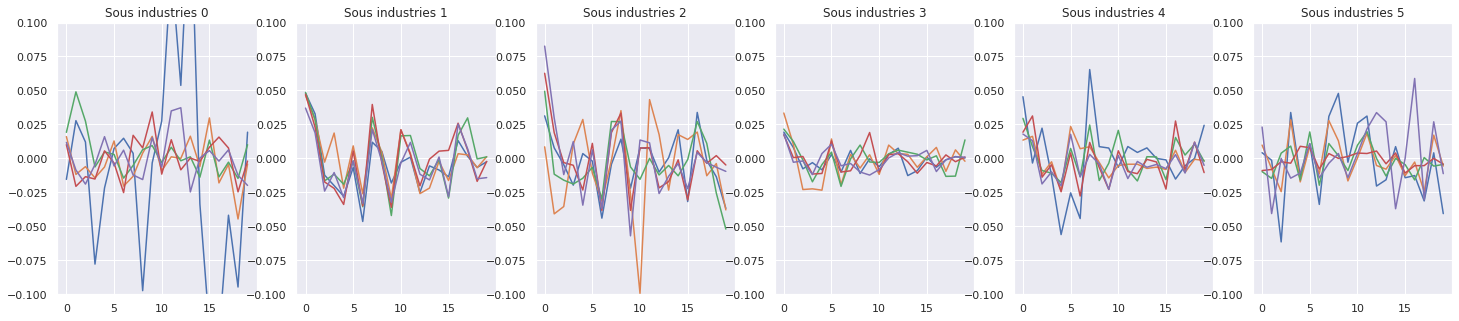

In [ ]:
#Observations des sous industries pour différentes Dates

import seaborn as sns
sns.set()

sous_industries = 6
id_sous_ind = 5

def affichage_SI(sous_industries, nbr_ligne_par_SI):
  fig, axs = plt.subplots(1,sous_industries, figsize=(25,5))
  for i in range(sous_industries):
    axs[i].set_ylim([-0.1, 0.1])  
    df_SUB_IND = choice_SI(i)
    df_SUB_IND = df_SUB_IND.reset_index(drop=True)
    for ii in range(nbr_ligne_par_SI):
      axs[i].plot(range(days), df_SUB_IND[ret_list].loc[ii,:])
      axs[i].set_title("Sous industries {}".format(i))

affichage_SI(sous_industries, id_sous_ind)



## **Regroupement des sous-industries par secteur**

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

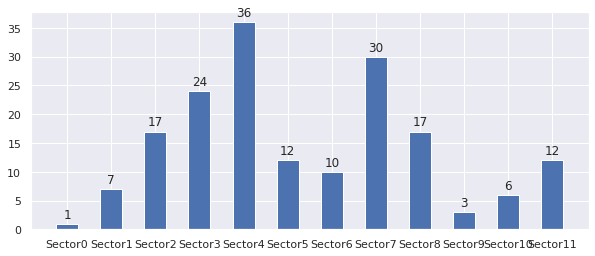

In [ ]:
def si_in_sector(id_sector):
  df_sector = x_train
  df_sector = df_sector.loc[df_sector['SECTOR'] == id_sector]
  list_sector_SI = df_sector['SUB_INDUSTRY'].unique()
  list_sector_SI.sort()
  nb_si = len(list_sector_SI) 
  return nb_si, list_sector_SI


list_si = []
list_nom_si = []
for i in range(12):
  nb_si, list_SI_sector = si_in_sector(i)
  list_si.append(nb_si)
  list_nom_si.append("Sector{}".format(i))
  #ax = plt.bar(i,nb_si,align='center')

fig, ax = plt.subplots(figsize = (10,4))
ax.bar(range(12),list_si,align='center', width=0.5)
ax.set_xticks(range(12))
ax.set_xticklabels(list_nom_si)
for i in range(12): 
  ax.annotate(
      list_si[i],                      # Use `label` as label
      (i, list_si[i]+1),         # Place label at end of the bar        
      ha='center')                # Horizontally center label   

n4, l4 = si_in_sector(2)
l4
  
  


## **Exploration d'un secteur par ces sous-industries**


0.03248671663445779

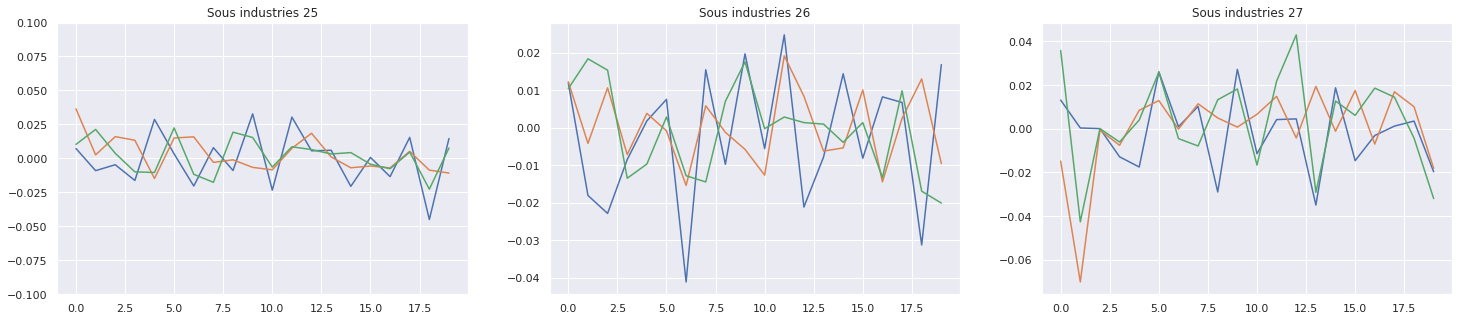

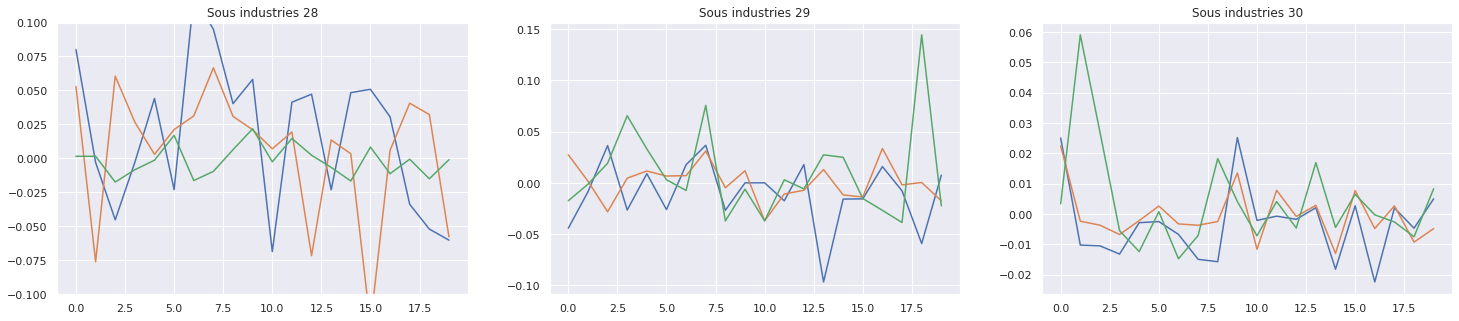

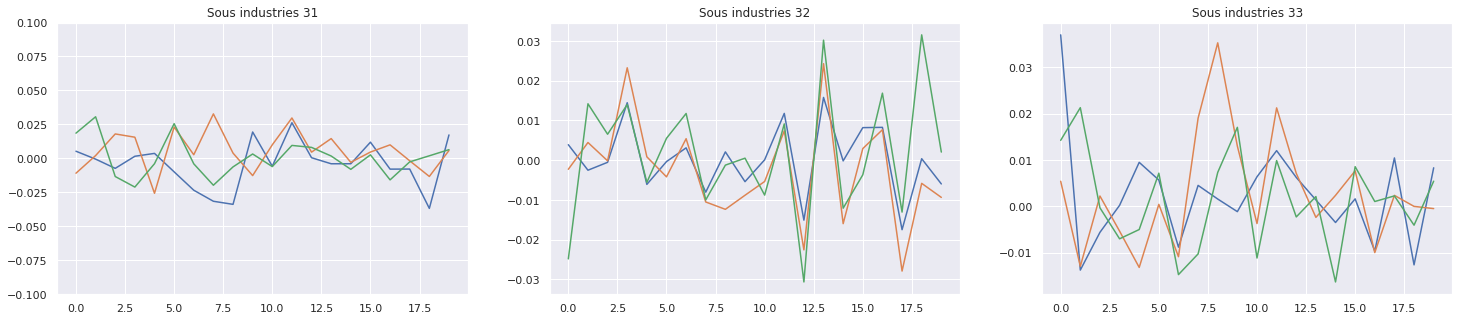

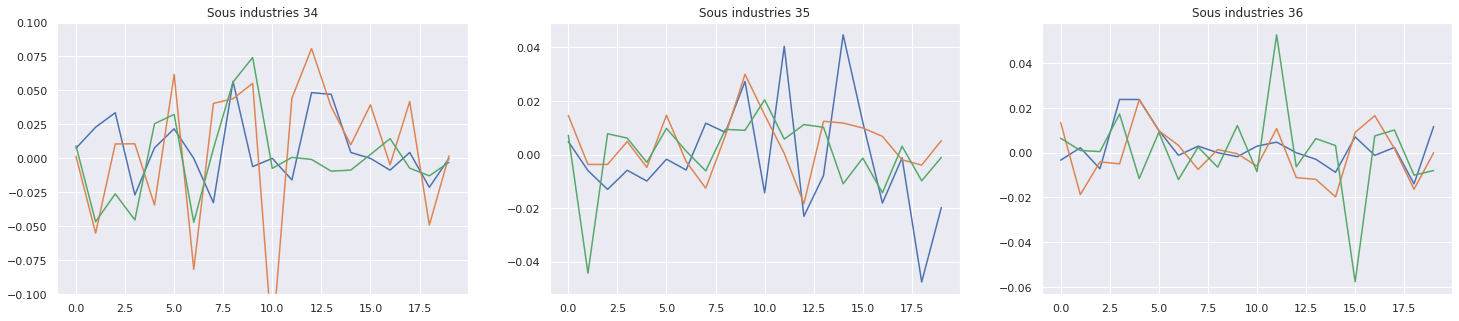

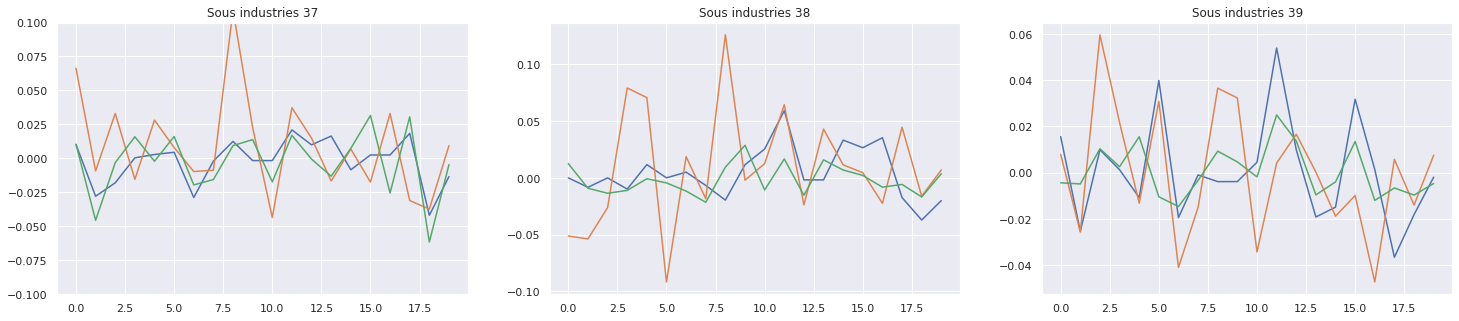

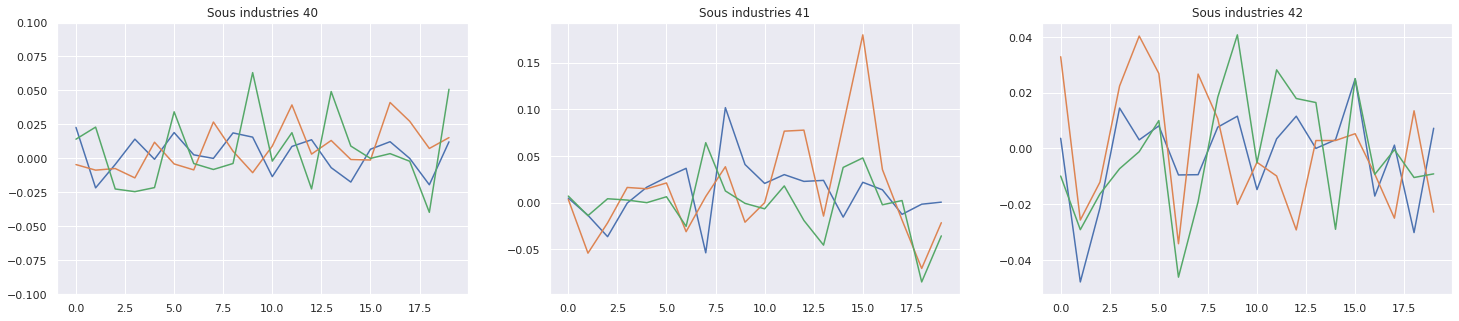

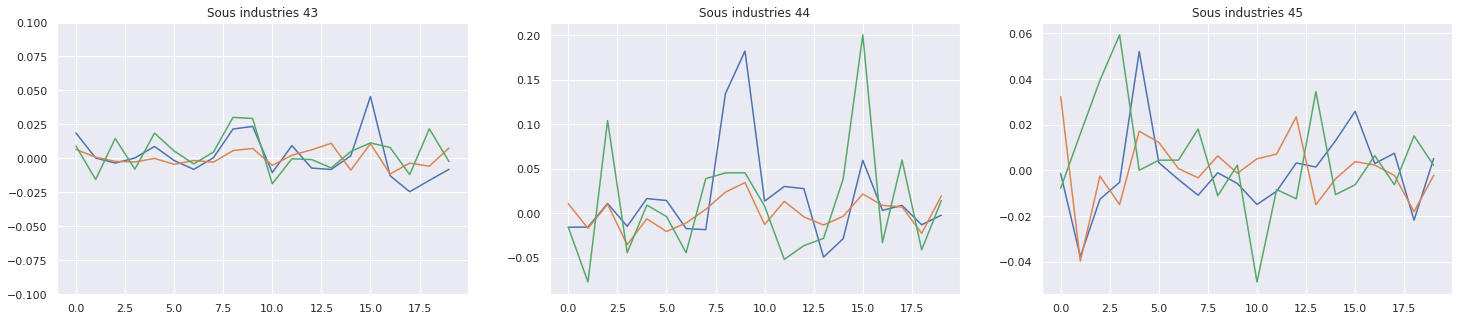

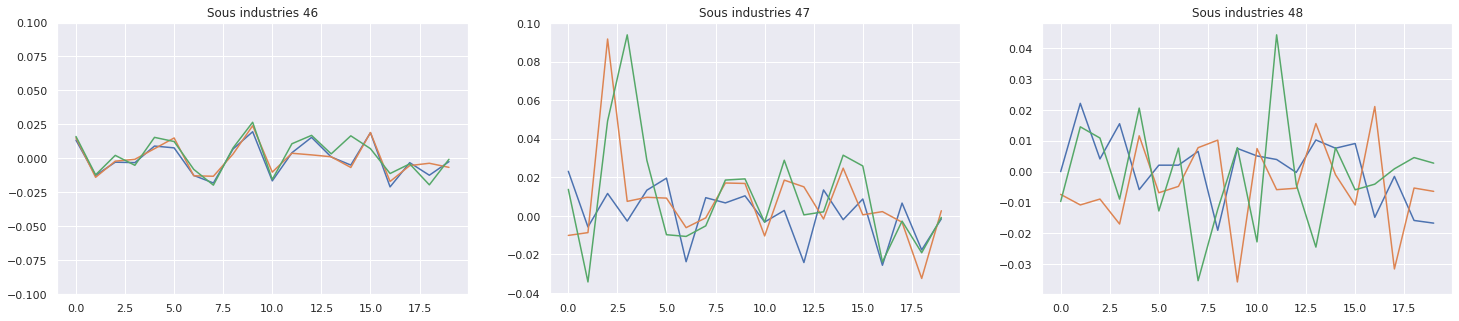

In [ ]:
# Exploration de sector 1
# Chaque plot affiche pour une sous-industries les variations qu'elle a vécu pour N dates sur 20 jours


def affichage_SI2(sous_industries, nbr_ligne_par_SI, nb_ind):
  fig, axs = plt.subplots(1,3, figsize=(25,5),squeeze=False)
  axs[0,0].set_ylim([-0.1, 0.1])  
  for i in range(3):
    if (sous_industries + i <= nb_ind):
      df_SUB_IND = choice_SI(sous_industries+i)
      df_SUB_IND = df_SUB_IND.reset_index(drop=True)
      for ii in range(nbr_ligne_par_SI):
        axs[0,i].plot(range(days), df_SUB_IND[ret_list].loc[ii,:])
        axs[0,i].set_title("Sous industries {}".format(sous_industries+i))
    else:
      return 0

def explo_secteur(exp_sec, len_tot, df_ALLSI_SEC):
  #Récupération de toutes les sous-industries pour le secteur : exp_sec. 
  n4, l4 = si_in_sector(exp_sec)
  #Récupération des données de chacune de ces sous-industries
  for n in l4:
    len_tot += len(choice_SI(n))
    df_ALLSI_SEC = pd.concat([df_ALLSI_SEC, choice_SI(n)])

  for n in range(l4[0], l4[-1], 3):
    #Ici 10 est le nombre d'affichage de date pour toute sous-indsutries
    affichage_SI2(n, 3, l4[0]+len(l4)-1) 

  df_ALLSI_SEC = df_ALLSI_SEC.reset_index(drop=True) 

  return len_tot, df_ALLSI_SEC


## CHOIX SECTEUR
exp_sec = 3
len_tot = 0
df_ALLSI_SEC = None

len_tot, df_ALLSI_SEC = explo_secteur(exp_sec, len_tot, df_ALLSI_SEC)
df_ALLSI_SEC.head()
df_ALLSI_SEC.iloc[288][4]



In [ ]:
#Récupération des données manquantes

df_ALLSI_SEC.head()
df_ALLSI_SEC.isna().sum()



SUB_INDUSTRY      0
DATE              0
RET_1           291
RET_2           301
RET_3           306
RET_4           305
RET_5           306
RET_6           304
RET_7           306
RET_8           316
RET_9           327
RET_10          323
RET_11          347
RET_12          362
RET_13          372
RET_14          518
RET_15          607
RET_16          638
RET_17          641
RET_18          639
RET_19          641
RET_20          644
dtype: int64

In [ ]:
#Moyenne pour un secteur des RETS
for i in range(20):
  print("MEAN RET {} : {}".format(i,df_ALLSI_SEC['RET_%d' % (i+1)].mean()))


MEAN RET 0 : 0.0013755102209264904
MEAN RET 1 : 0.0014353029662254686
MEAN RET 2 : 0.001915671430989429
MEAN RET 3 : -0.0007308301503511086
MEAN RET 4 : 0.00022508068018441742
MEAN RET 5 : -0.00019534035914729134
MEAN RET 6 : 0.0006803789017789207
MEAN RET 7 : 0.0004906753569365718
MEAN RET 8 : -0.0003919481182001075
MEAN RET 9 : 0.00034351735456106995
MEAN RET 10 : -0.0005400947828124246
MEAN RET 11 : 0.0006305605803451791
MEAN RET 12 : 0.0013898646006442843
MEAN RET 13 : 0.002602663374357825
MEAN RET 14 : 0.002241089297872565
MEAN RET 15 : 0.0011957554303920436
MEAN RET 16 : 0.0015012237794237758
MEAN RET 17 : 0.0010458551992680962
MEAN RET 18 : -0.0010109008895457692
MEAN RET 19 : -0.0002676392363585672


Idées:
- Remplacer N/A avec moyenne du secteur à la même date.
- Utiliser LSTM vanilla


In [ ]:
import numpy as np
df_ALLSI_SEC.isna().sum()

""" Récupère les indexs et position de chaque NaN avant traitement"""

for i in range(5000):
  a = df_ALLSI_SEC.iloc[i]
  indexes = [index for index,element in enumerate(a) if np.isnan(element)]
  if len(indexes) != 0:
      print("{} : {}".format(i,indexes))
  


692 : [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
693 : [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
694 : [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
727 : [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
925 : [16, 17, 18, 19, 20, 21]
941 : [16, 17, 18, 19, 20, 21]
948 : [16, 17, 18, 19, 20, 21]
952 : [16, 17, 18, 19, 20, 21]
955 : [16, 17, 18, 19, 20, 21]
1047 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1048 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1049 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1050 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1051 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1052 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1053 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1054 : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
1055 : [2, 3, 4, 

In [ ]:
""" Pour chaque date unique, on récupère le dataframe pour une date voulue, on fait la moyenne
pour chaque colonne RET """

list_date = df_ALLSI_SEC['DATE'].unique()

for d in list_date:
  df = df_ALLSI_SEC[(df_ALLSI_SEC['DATE'] == d)]

  column_means = df.mean()
  df_ALLSI_SEC = df_ALLSI_SEC.fillna(column_means)


df_ALLSI_SEC.isna().sum()



Indicateur de variation